<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_11_07_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04. 분류

>**01. 분류의 개요**

지도학습은 레이블 즉, 명시적 정답이 잇는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 대표적 유형이 분류. 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지하고, 새롭게 관측된 데이터에 대한 레이블을 판별. 분류를 구현하는 다양한 머신러닝 알고리즘은
<br/>나이브 베이즈(베이즈 통계와 생성 모델 기반), 로지스틱 회귀, 결정 트리(데이터 균일도에 따른 규칙 기반), 서포트 벡터 머신(개별 클래스 간 최대 분류 마진을 찾아줌), 최소 근접(근접 거리 기준), 신경망(심층 연결 기반), **앙상블(서로 다른/같은 머신러닝 알고리즘 결합)** 등이 있다.

<br/>앙상블은 일반적으로는 배깅, 부스팅으로 나뉜다. 배깅 : ex. 랜덤 포레스트, 부스팅 : ex. 그래디언트 부스팅, XgBoost, LighGBM. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리. 결정 트리는 사전 가공의 영향이 매우 적지만 복잡한 규칙 구조를 가져야 하며 이로 인한 과적합 발생할 수 있음. 하지만 이 점은 앙상블에서는 오히려 장점.


>**02. 결정 트리**

머신러닝 알고리즘 중 직관적 이해가 쉬움. 데이터의 규칙을 학습으로 찾아내 트리 기반의 분류 규칙을 만든느 것. if/else로 규칙을 쉽게 표현 가능. 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 효율적인 분류일지가 성능을 크게 좌우.
<br/>규칙 노드 : 규칙 조건. 리프 노드 : 결정된 클래스 값, 새로운 규칙마다 서브 트리 생성. 많은 규칙이 있다=복잡->과적합. 즉, 트리의 깊이가 깊어지면 결정트리의 예측 성능 저하될 가능성 높다. 적은 결정 노트로 높은 예측 정확도 -> 데이터 분류 시 최대한 많은 데이터 세트가 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야함. 균일한 데이터 세트를 구성하도록 분할하기. 

<br/>균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다. 결정 노드는 정보 균일도가 높은 데이터셋을 먼저 선택하도로 규칙 조건을 만든다. 다시 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 내려가며 반복하는 형식. 이렇게 정보의 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음.

* 정보 이득 : 엔트로피(혼잡도) 개념 기반. 정보 이득 지수는 1-엔트로피 지수. 정보 이득이 높은 속성을 기준으로 분할
* 지니 계수 : 원래 경제학의 불평등 지수. 0이 가장 평등. 1이 가장 불평등. 지니 계수 낮을수록 데이터 균일도 높아 낮은 속성 기준으로 분할.

정보 이득이 높거나 지니계수 낮은 조건 찾아 자식 트리 노드에 걸쳐 반복적 분할 후, 데이터가 모두 특정 분류에 속하게 되면 분할 멈추고 분류 결정.

  **1. 결정 트리 모델의 특징**

결정 트리 장점 : 쉽고 직관적. 단점 : 과적합으로 정확도 떨어짐. 복잡한 학습 모델은 결국 실제 상황에 유연한 대처 불가능해 예측 성능 감소. 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움이 됨.

 **2. 결정 트리 파라미터**

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스 제공.
<br/>min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어에 사용, 디폴트는 2, 작게 설정할수록 분할되는 노드 많아져 과적합 가능성 증가
<br/>min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적한 제어 용도지만 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요.
<br/>max_features : 최적 분할을 위해 고려할 최대 피처 개수
<br/>max_depth : 트리의 최대 깊이.
<br/>max_leaf_nodes : 말단 노드의 최대 개수

  **3. 결정 트리 모델의 시각화**

결정 트리 알고리즘 시각화 by Graphviz 패키지. exort_graphviz() API 제공. 

In [1]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file"tree.dot", class_names=iris_data.target_names, \
                feature_naems=iris_data.feature_names, impurity=True, filled=True)

SyntaxError: ignored

In [ ]:
import graphviz
#위에서 생성된 tree.dot 파일 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

시각화 가능. 살펴보자. 리프 노드 :  더이상 자식 노드가 없다. 최종 클래스 값이 결정되는 노드. 자식 노드가 있는 노드는 브랜치 노드. 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미. 색이 짙어질수록 지니 계수 낮고 해당 레이블에 속하는 샘플 데이터 많다. 결정 트리는 어떤 속성을 규칙 조건으로 선택하는지가 중요한 요건. 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 feature_importances_ 속성으로 제공한다. ndarray 형태로 값을 반환.

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_mportances_, 3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance 를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

AttributeError: ignored

petal_length가 가장 피처 중요도가 높다.

  **3. 결정 트리 과적합**

make_calssification() 사용해 임의의 데이터 세트 만들어 분류해보자. 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 셋 만들고 시각화 할 거임.

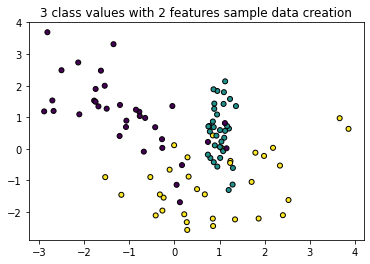

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

#2차원 시각화 위해 피처 2개, 클래스 3개 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

이제 결정 트리 학습하자. 첫 학습은 별 제약 없음. visualize_boundary 함수를 이용해 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 이해하게 해줌.

In [8]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: ignored

In [ ]:
#min_samples_leaf=6으로 트리 생성 조건 제약
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으며 일반화된 분류 규칙에 따라 분류됨. 제약한 모델이 성능이 더 뛰어날 가능성이 높다.

>**03. 앙상블 학습**

**1. 앙상블 학습 개요**

